In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import wave
from pydub import AudioSegment
import scipy
from scipy.io import wavfile #audio i/o
from IPython.display import Audio #listening to audio
import thinkdsp
import thinkstats2
%matplotlib inline

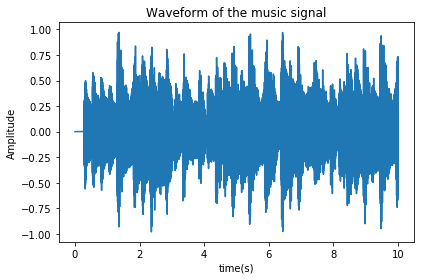

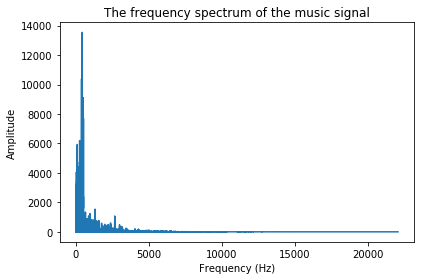

In [2]:
music = thinkdsp.read_wave('music.wav').segment(start = 0, duration = 10)
music.plot()
thinkdsp.decorate(xlabel = 'time(s)', ylabel = 'Amplitude', title = "Waveform of the music signal")
music_spec = music.make_spectrum()
plt.figure()
music_spec.plot()
thinkdsp.decorate(xlabel = "Frequency (Hz)", ylabel = "Amplitude", title = "The frequency spectrum of the music signal")
music.make_audio()

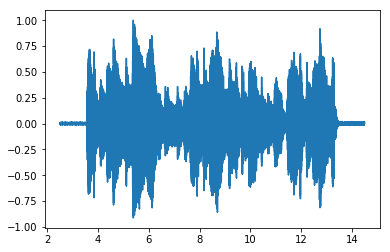

In [25]:
recv_ch1 = thinkdsp.read_wave('High_SNR.wav').segment(start = 2.5, duration = 12)
recv_ch1.plot()
recv_ch1.make_audio()

35149


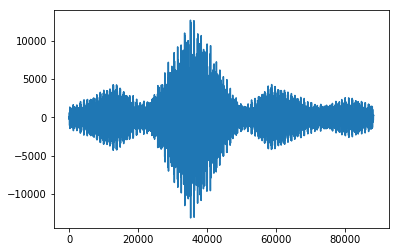

In [57]:
from scipy import signal
corr = signal.correlate(recv_ch1.ys, music.ys, 'valid')
plt.plot(corr)
start = np.argmax(corr)
print(start)


In [56]:
len(corr)

88201

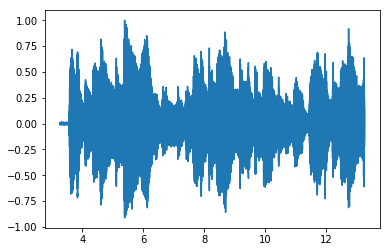

In [86]:
recv_ch1_seg = recv_ch1.segment(start = 2.5+(start-2700)/44100, duration = 10)
plt.figure()
recv_ch1_seg.plot()
recv_ch1_seg.make_audio()

22050.0

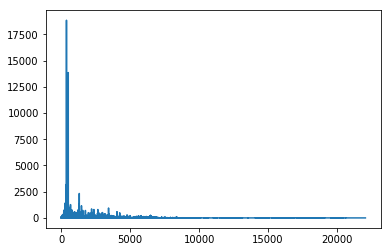

In [87]:
recv_ch1_seg_spec = recv_ch1_seg.make_spectrum()
recv_ch1_seg_spec.plot()
recv_ch1_seg_spec.fs[-1]

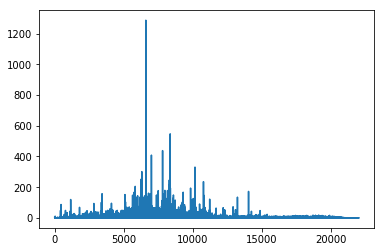

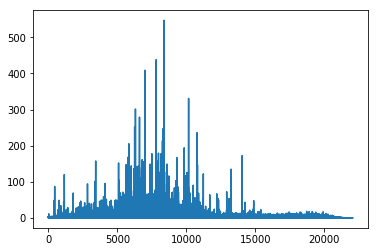

In [88]:
H1 = np.fft.rfft(recv_ch1_seg.ys)/np.fft.rfft(music.ys)
x = np.linspace(0, 44100/2, len(H1))
plt.plot(x, np.abs(H1))
midx = list(np.abs(H1)).index(np.max(np.abs(H1)))
H1[midx] = 0
plt.figure()
plt.plot(x, np.abs(H1))

Text(0,0.5,'Amplitude')

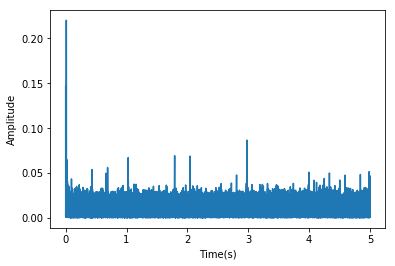

In [89]:
cir1 = np.fft.ifft(H1)
plt.figure()
x = np.linspace(0, len(cir1)/44100, len(cir1))
plt.plot(x,np.abs(cir1))
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

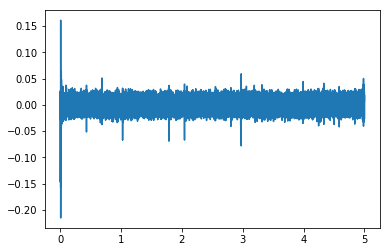

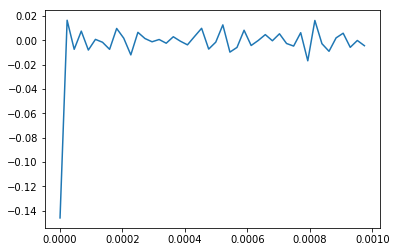

In [90]:
channel1 = thinkdsp.Wave(cir1, framerate = 44100)
channel1.plot()
st_channel1 = channel1.segment(start = 0, duration = 0.001)
plt.figure()
st_channel1.plot()

In [91]:
from ipywidgets import interact, fixed
def InteractOffset(offset):
    recv_seg = recv_ch1.segment(start = 2.5+(start+offset)/44100, duration = 10)
    H = np.fft.fft(recv_seg.ys)/np.fft.fft(music.ys)
    Channel = np.fft.ifft(H)
    x = np.linspace(0, len(Channel)/44100, len(Channel))
    plt.plot(x, np.abs(Channel))
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude')
interact(InteractOffset, offset = (-10000,10000,10))

interactive(children=(IntSlider(value=0, description='offset', max=10000, min=-10000, step=10), Output()), _do…

<function __main__.InteractOffset(offset)>

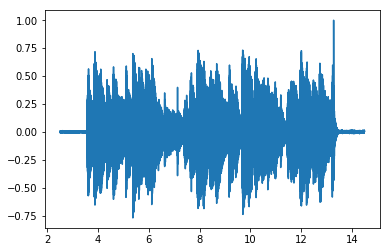

In [77]:
recv_ch2 = thinkdsp.read_wave('High_SNR.wav', channel = 2).segment(start = 2.5, duration = 12)
recv_ch2.plot()
recv_ch2.make_audio()

36483


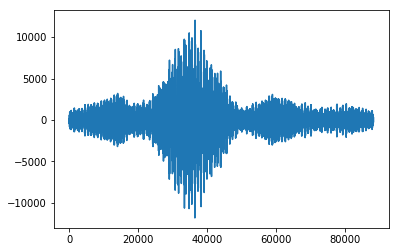

In [80]:
corr = np.correlate(recv_ch2.ys, music.ys, 'valid')
plt.plot(corr)
start = np.argmax(corr)
print(start)

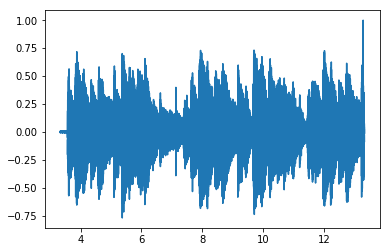

In [81]:
recv_ch2_seg = recv_ch2.segment(start = 2.5+start/44100, duration = 10)
plt.figure()
recv_ch2_seg.plot()
recv_ch2_seg.make_audio()

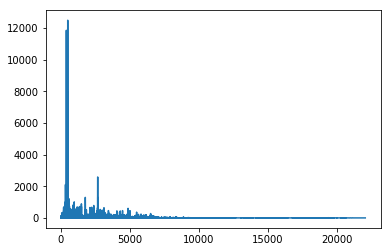

In [82]:
recv_ch2_seg_spec = recv_ch2_seg.make_spectrum()
recv_ch2_seg_spec.plot()

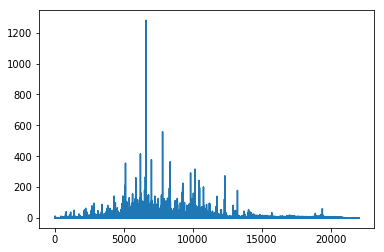

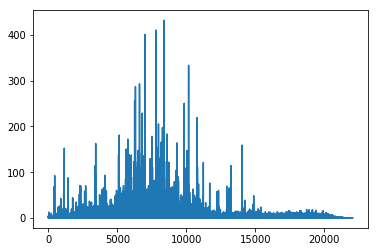

In [83]:
H2 = np.fft.rfft(recv_ch2_seg.ys)/np.fft.rfft(music.ys)
x = np.linspace(0, 44100/2, len(H2))
plt.plot(x, np.abs(H2))
midx = list(np.abs(H2)).index(np.max(np.abs(H2)))
H1[midx] = 0
plt.figure()
plt.plot(x, np.abs(H1))


Text(0,0.5,'Amplitude')

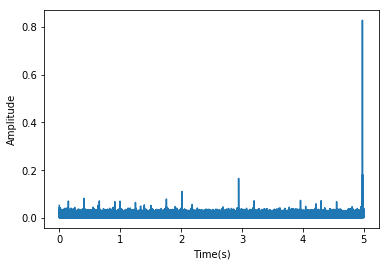

In [84]:
cir2 = np.fft.ifft(H2)
plt.figure()
x = np.linspace(0, len(cir2)/44100, len(cir2))
plt.plot(x,np.abs(cir2))
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

In [85]:
def InteractOffset(offset):
    recv_seg = recv_ch2.segment(start = 2.5+(start+offset)/44100, duration = 10)
    H = np.fft.fft(recv_seg.ys)/np.fft.fft(music.ys)
    Channel = np.fft.ifft(H)
    x = np.linspace(0, len(Channel)/44100, len(Channel))
    plt.plot(x, np.abs(Channel))
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude')
interact(InteractOffset, offset = (-10000,10000,10))

interactive(children=(IntSlider(value=0, description='offset', max=10000, min=-10000, step=10), Output()), _do…

<function __main__.InteractOffset(offset)>